# Yeni Bir İris Çiçeğinin Hangi Türe Ait olduğunu Bulma

##  Bu dersimiz de iris veri seti için denetimli öğrenme yöntemlerimden K en yakın komşuşu algoritmasını kullnarak yeni bir makine öğrenmesi modeli oluşturuldu. 

In [2]:
# Soru  : Bir botanis Yeni bir iris çiçeğinin hangi türe ait olduğunu bulmak istiyor ?

In [6]:
# Amaç : İris çiceiğinin bilinen türlerinden İris çiçeğini öğrenecek ve makine öğrenmesi modeli oluşturacak ve bu model ile yeni bir 
# yeni iris türlerini tespit edebilecek

In [8]:
# NOT : bu bir Supervised yani denetimli öğretim olacak. Çünkü başlangıçta irisin türlerini biliyoruz. 
# ayni zamanda bu iris çiçeğinin 3 türünden birini tahmin etmek istediğimizden dolayı Classficationa yani sınıflandırmaya da bir örnek 
# olacak

In [12]:
# ÖZETLE 

# - 1 Veriyi Tanıyacağız.. 2. Veriyi PArçalayacağız.  - 3. Veriyi görselleştireceğiz. 4. Model oluşturacapız 
# 5 - yeni veriyi tahmin edeceğiz.  6 - modeli değerlendireceğiz

##### iris veri seti, sklearn kütüphabesinin dataset modulunde var ve onu çağırıryoruz.

In [16]:
from sklearn.datasets import load_iris
iris=load_iris()

##### veri setindeki anahtarları görrmek için

In [23]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


##### buradaki DESC veri setinin özetinin bunu ekrana yazdırıyoruz

In [30]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

##### Target name tahmin etmek istediğim çiçeğin türlerini gösterir. ekrana yazdırıyorum

In [33]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [35]:
print(iris['feature_names']) # niteliklerin isimlerini gösterir

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [37]:
print(type(iris['data'])) # verisetinin tipinin görüyoruz, veri seti n boyutlu bir numpy verisi

<class 'numpy.ndarray'>


In [39]:
print(iris['data'].shape)  # veri iki boyutlu, 150 farklı çicek var ve 4 çeşitli

(150, 4)


In [47]:
print(iris['data'][:5]) # ilk 5 çiceğin 4 niteliğinin değerlerini yazdırır

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [49]:
print(iris['target']) # 0 , 1 , 2 tam sayıları ile kodlanan 150 değer ekrana yazdırıldı 

# - 0= setosa
# - 1= versicolor
# - 2= virginica   sayılar bu çeşitleri temsil eder

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Veri Setini Parçalama

In [52]:
# model iki parçaya bölünür trainin ve test verisi olarak. 
# traning - eğitim verisi,    test verisi

In [54]:
from sklearn.model_selection import train_test_split  

# train_test_split  bu fonksiyon satırları önce kariştırır. sonra %75 ini eğitim verisi, geri kalanı test verisi olarak alır.

In [58]:
# X = veri (data) - iki boyutlu dizi yani matristir.
# y = etiket (target) - bir bouyutlu sizi.

In [60]:
X_egitim, X_test, y_egitim, y_test = train_test_split(iris['data'],iris['target'], random_state=0)

# X ve y değişkenkerini train_test_split fonksiyonu ile oluşturdum.

In [62]:
print(X_egitim.shape) 
print(y_egitim.shape)

# egitim verilerinin yapısına bakalım

(112, 4)
(112,)


In [64]:
print(X_test.shape) 
print(y_test.shape)

# test verilerinin yapısına bakalım

(38, 4)
(38,)


## Veri Ön İnceleme

In [67]:
import pandas as pd

In [75]:
iris_df=pd.DataFrame(X_egitim, columns=iris.feature_names)

# dataframe yapısını oluşturdum

In [77]:
from pandas.plotting import scatter_matrix

In [91]:
%matplotlib inline

#grafikleri satır aralarında görmek için

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

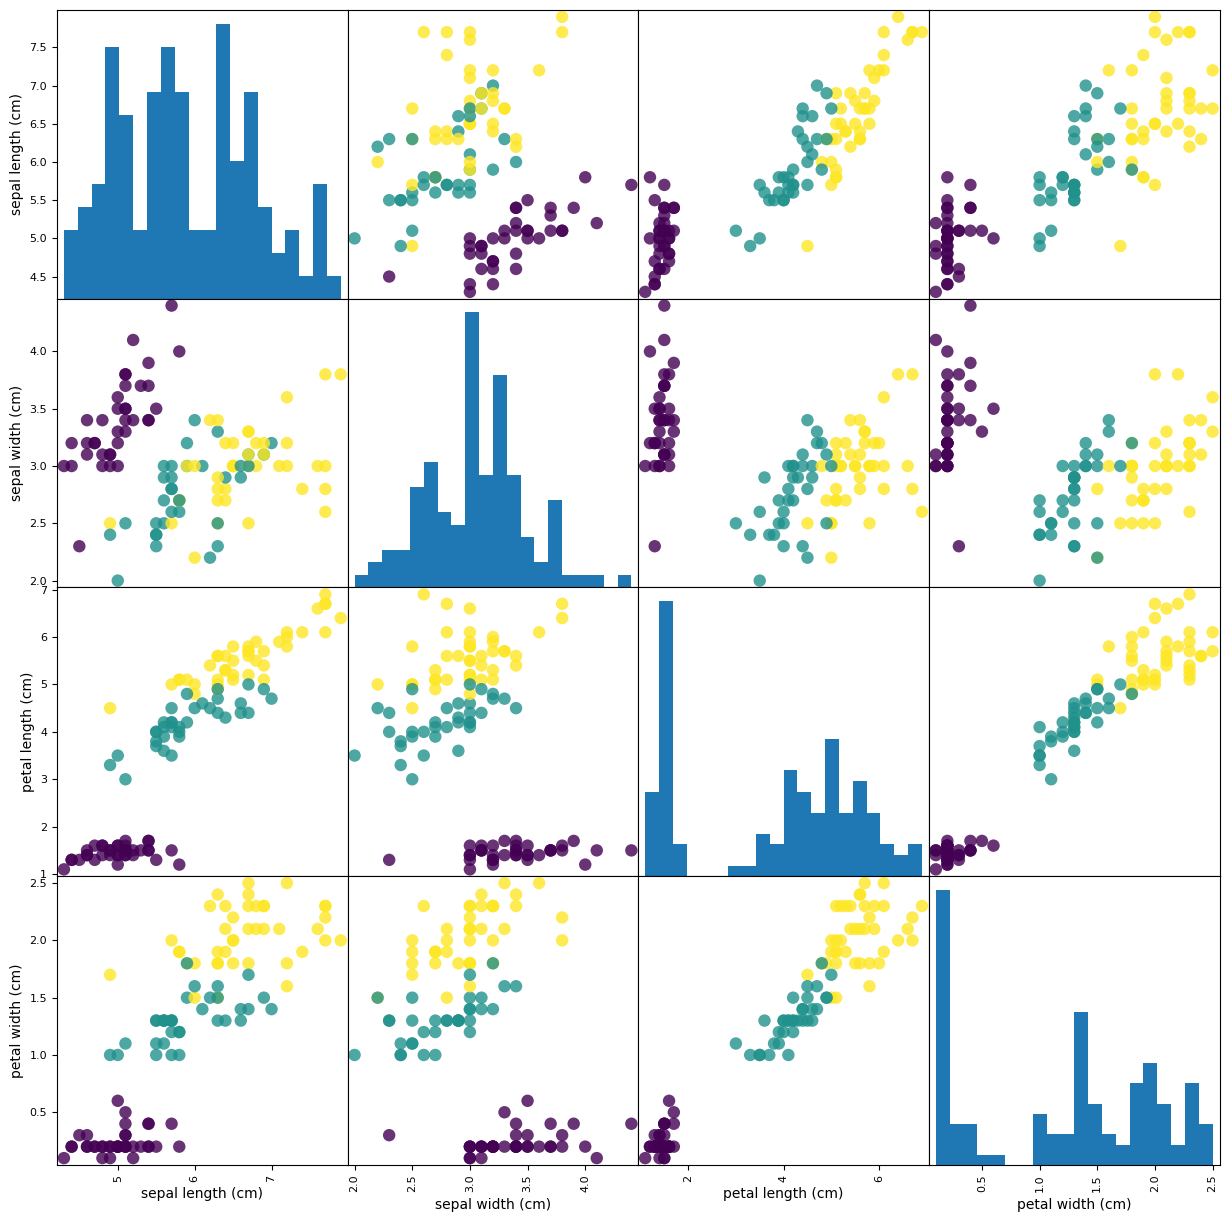

In [95]:
scatter_matrix(iris_df, c=y_egitim, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=80, alpha=0.8)


# c=y veriyi tiürlere göre renklendirmek için yapıldı
# figsize  - grafiğin boyutu ayarlandı
# marker=   datalar nokta şeklinde gösterilmesi için
# hist_kw=  histogramların dikdörtgen genişlikleri için 20 yazdık
# s=80  - noktaların buyukluğu için
# alpha= 0.8 -  noktaların görünümü için

In [97]:
# NOT: iki veri setinde özelliklerin ikişerli grafikleri ekrana gldi
# bu grafikten sepal ve petal ölçümüne göre 3 sınıfın güzel ayrılmış olduğunu görüyoruz.

#dolayısı ile yazacağımız makşe öğrenmesi modeli büyük ihtimalle bu sınıflara ayırmayı iyi öğrnecek

## Modeli Kurma

In [100]:
# model kurma yalnızca eğtim verisinden yapılır. 

In [106]:
from sklearn.neighbors import KNeighborsClassifier

# K en yakın komşusunun algoritmasını kullanmak için 

In [108]:
knn=KNeighborsClassifier(n_neighbors=1)

In [110]:
knn.fit(X_egitim,y_egitim)

# bu kmut knn 

KNeighborsClassifier(n_neighbors=1)

In [114]:
import numpy as np
X_yeni=np.array([[5,2.9,1,0.2]])
X_yeni.shape

# numpy kullanmak için numpy import ett
# tahmin edeceğin çiceiğin ölçilerini X_yeni diye bir değere atadı
#5,2.9,1,0.2 ölçüleri olan bir iris çiçeğini alalım. bir satır içinde bir çiçeğin dört tane ölçümü var

(1, 4)

In [116]:
tahmin=knn.predict(X_yeni)
print('Tahmin sınıfı:', tahmin)
print('Tahmin türü:', iris['target_names'][tahmin])

# tahmin yapmak için kn.predict nesnesini cağırdık. içerisine X_yeni verimizi yazdık.
# sınıfı ve türünü ekrana yazdırdık
# Sonuc: modele göre tür 0 ile kodlanan setosa çıktı

Tahmin sınıfı: [0]
Tahmin türü: ['setosa']


## Modelin Performansı

In [119]:
# modeli kurduk fakat bu modele ne kadar güvenebiliriz

In [121]:
# daha önce test verisi kurmuştuk. bu veriyi modeli kurarken kullanmadık. test versisindeki her bir iris çiçeğinin türünü biliyoruz.
# kurudğumuz modeli kullanarak test verisindeki her bir iris çiçeği için bir tahmin yapıp çıkan sonuçları gerçek verileri ile karşılaştırabiliriz.
# böylece modelin ne kadar iyi çalıştığını görebiliriz.

In [123]:
y_tahmin=knn.predict(X_test)
print(y_tahmin)

#X test verilerine göre tahminler ekrana yazıldı

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [127]:
print(np.mean(y_tahmin==y_test))

# tahmin edilen bu türlerin gerçek türle ne kadar eşit olduğunun ortalaması bulunur
# %97 oranında doğru tahmin ediyor

0.9736842105263158


In [129]:
print(knn.score(X_test,y_test))

0.9736842105263158


In [ ]:
# Bu dersimiz de iris veri seti için denetimli öğrenme yöntemlerimden K en yakın komşuşu algoritmasını kullnarak yeni bir makine öğrenmesi modeli oluşturuldu. 